In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from HelperFunctions import *
from PtOccupancyFunctions import *
import scipy.integrate
import pprint
import re

In [26]:
# path = "/home/helge/Applications/matsim/matsim-bimodal/scenarios/fine_grid/bimodal/output/merge/"
path = "/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/"

In [27]:
def getDirsFleetSizes(directory, mode="bimodal"):
    result = []
    sub_dirs = []
    sdirs = [
        sdir.path
        for sdir in
            os.scandir(directory)
        if sdir.is_dir() and "drt" in sdir.name
    ]

    for sdir in sorted(sdirs, key=lambda x: int(re.search("\d+",x.split("/")[-1])[0])):
        subresult = {}
        subresult["root"] = sdir
        for root, subdirs, files in os.walk(sdir):
            subroot = root.replace(directory,"")
            for file in files:
                if file=="0.trips.csv.gz" and mode in subroot:
                    subresult["trips"] = os.path.join(root, file)
                if file=="0.vehicleDistanceStats_drt.csv" and mode in subroot:
                    subresult["drt_dists"] = os.path.join(root, file)
                if file=="trip_success.csv.gz" and mode in subroot:
                    subresult["trip_success"] = os.path.join(root, file)
                if file=="0.CummulativePtDistance.txt" and mode in subroot:
                    subresult["pt_dist"] = os.path.join(root, file)
                if file=="0.drt_occupancy_time_profiles_drt.txt" and mode in subroot:
                    subresult["drt_occupancy"] = os.path.join(root, file)
                if file=="0.occupancyAnalysis.txt" and mode in subroot:
                    subresult["pt_occupancy"] = os.path.join(root, file)
                if file=="0.drt_trips_drt.csv" and mode in subroot:
                    subresult["drt_trips"] = os.path.join(root, file)
                if file=="0.drt_detours_drt.csv" and mode in subroot:
                    subresult["drt_detours"] = os.path.join(root, file)
                if file=="ph_modestats.txt" and mode in subroot:
                    subresult["ph_modestats"] = os.path.join(root, file)
                if file=="pkm_modestats.txt" and mode in subroot:
                    subresult["pkm_modestats"] = os.path.join(root, file)
                    
        result.append(subresult)
    
    return result

def getCarDir(directory):
    result = {}
    result["root"] = getDir(directory, "car")
    for root, subdirs, files in os.walk(result["root"]):
        for file in files:
            if file=="0.trips.csv.gz":
                result["trips"] = os.path.join(root, file)
            if file=="trip_success.csv.gz" and "unimodal" not in root:
                result["trip_success"] = os.path.join(root, file)
    
    return result

def getDir(path, directory):
    for root, subdirs, files in os.walk(path):
        for subdir in subdirs:
            if subdir == directory:
                return os.path.join(root, subdir)

def getDirsReqs(path):
    result = {}
    for subdir in os.listdir(path):
        result[int(re.match("(\d*)reqs", subdir)[1])] = getDirsFleetSizes(os.path.join(path, subdir), mode="unimodal")
    return result

req_dirs = getDirsReqs(path)
pprint.pprint(req_dirs)
# car_dir = getCarDir(path)
n_sims = len(req_dirs)
print(n_sims)

{100: [{'drt_detours': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/100reqs/1drt/unimodal/ITERS/it.0/0.drt_detours_drt.csv',
        'drt_dists': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/100reqs/1drt/unimodal/ITERS/it.0/0.vehicleDistanceStats_drt.csv',
        'drt_occupancy': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/100reqs/1drt/unimodal/ITERS/it.0/0.drt_occupancy_time_profiles_drt.txt',
        'drt_trips': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/100reqs/1drt/unimodal/ITERS/it.0/0.drt_trips_drt.csv',
        'ph_modestats': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/100reqs/1drt/unimodal/ph_modestats.txt',
        'pkm_modestats': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/outpu

          'trips': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/20000reqs/104drt/unimodal/ITERS/it.0/0.trips.csv.gz'},
         {'drt_detours': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/20000reqs/105drt/unimodal/ITERS/it.0/0.drt_detours_drt.csv',
          'drt_dists': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/20000reqs/105drt/unimodal/ITERS/it.0/0.vehicleDistanceStats_drt.csv',
          'drt_occupancy': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/20000reqs/105drt/unimodal/ITERS/it.0/0.drt_occupancy_time_profiles_drt.txt',
          'drt_trips': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/20000reqs/105drt/unimodal/ITERS/it.0/0.drt_trips_drt.csv',
          'ph_modestats': '/scratch01.local/hheuer/matsim-bimodal/

          'drt_occupancy': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/30000reqs/182drt/unimodal/ITERS/it.0/0.drt_occupancy_time_profiles_drt.txt',
          'drt_trips': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/30000reqs/182drt/unimodal/ITERS/it.0/0.drt_trips_drt.csv',
          'ph_modestats': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/30000reqs/182drt/unimodal/ph_modestats.txt',
          'pkm_modestats': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/30000reqs/182drt/unimodal/pkm_modestats.txt',
          'pt_dist': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/30000reqs/182drt/unimodal/ITERS/it.0/0.CummulativePtDistance.txt',
          'root': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/

 100000: [{'drt_detours': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/100000reqs/400drt/unimodal/ITERS/it.0/0.drt_detours_drt.csv',
           'drt_dists': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/100000reqs/400drt/unimodal/ITERS/it.0/0.vehicleDistanceStats_drt.csv',
           'drt_occupancy': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/100000reqs/400drt/unimodal/ITERS/it.0/0.drt_occupancy_time_profiles_drt.txt',
           'drt_trips': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/100000reqs/400drt/unimodal/ITERS/it.0/0.drt_trips_drt.csv',
           'ph_modestats': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/100000reqs/400drt/unimodal/ph_modestats.txt',
           'pkm_modestats': '/scratch01.local/hheuer/matsim

           'root': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/100000reqs/535drt',
           'trip_success': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/100000reqs/535drt/unimodal/trip_success.csv.gz',
           'trips': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/100000reqs/535drt/unimodal/ITERS/it.0/0.trips.csv.gz'},
          {'drt_detours': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/100000reqs/540drt/unimodal/ITERS/it.0/0.drt_detours_drt.csv',
           'drt_dists': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/100000reqs/540drt/unimodal/ITERS/it.0/0.vehicleDistanceStats_drt.csv',
           'drt_occupancy': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/1000

 300000: [{'drt_detours': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/300000reqs/1086drt/unimodal/ITERS/it.0/0.drt_detours_drt.csv',
           'drt_dists': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/300000reqs/1086drt/unimodal/ITERS/it.0/0.vehicleDistanceStats_drt.csv',
           'drt_occupancy': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/300000reqs/1086drt/unimodal/ITERS/it.0/0.drt_occupancy_time_profiles_drt.txt',
           'drt_trips': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/300000reqs/1086drt/unimodal/ITERS/it.0/0.drt_trips_drt.csv',
           'ph_modestats': '/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/unimodal/output/100GridSpacingInvGamma/300000reqs/1086drt/unimodal/ph_modestats.txt',
           'pkm_modestats': '/scratch01.local/hheuer/m

In [28]:
# print(req_dirs[50000])

In [29]:
def getTrips(paths, mode):
    if mode == "bimodal":
        columns=["person","trav_time","wait_time","traveled_distance","modes"]
    elif mode == "unimodal":
        columns=["person","trav_time","wait_time"]
    elif mode == "car":
        columns=["person", "traveled_distance", "trav_time"]
    path = paths["trips"]
    df = pd.read_csv(path, sep=";").loc[:,columns]
    df["trav_time"] = df["trav_time"].apply(timestmp2sec)
    df.set_index("person", inplace=True)
    if mode=="car":
        df = df.groupby("person").agg(
            {
                "trav_time": np.sum,
                "traveled_distance": np.sum
            }
        )
        return df
    df["wait_time"] = df["wait_time"].apply(timestmp2sec)
    if mode=="unimodal":
        df = df.groupby("person").agg(
            {
                "trav_time": np.sum,
                "wait_time": np.sum,
            }
        )
        return df
    if mode == "bimodal":
        df = df.groupby("person").agg(
            {
                "trav_time": np.sum,
                "wait_time": np.sum,
                "traveled_distance": np.sum,
                "modes": combineModesSeriesStr,
            }
        )
        return df
    
def getFleetSize(path):
    return re.search("\d+", path.split("/")[-1])[0]

def getEll(path):
    return path.split("/")[-1].split("_")[-1]

def getModeStats(paths, columns_ph, columns_pkm):
    path_ph = paths["ph_modestats"]
    path_pkm = paths["pkm_modestats"]
    df_ph = pd.read_csv(path_ph, sep='\t').loc[:,columns_ph]
    df_pkm = pd.read_csv(path_pkm, sep='\t').loc[:,columns_pkm]
    return df_ph.to_numpy()[0], df_pkm.to_numpy()[0]

def getDrtVehicleDistances(paths):
    path = paths["drt_dists"]
    df = pd.read_csv(path, sep=";")["drivenDistance_m"]
    return df

def getTripSuccess(paths):
    path = paths["trip_success"]
    df = pd.read_csv(path, sep=";", index_col="personId")
    return df

def getCummulativePtDistance(paths):
    path = paths["pt_dist"]
    df = pd.read_csv(path).values[0, 0]
    return df

def getDrtOccupandyAndStandingFrac(paths, exclude_empty_vehicles, count_idle_vehicles=False):
    path = paths["drt_occupancy"]
    df = pd.read_csv(path, sep="\t")
    df["time"] = df["time"].apply(timestmphm2sec)
    drt_occ, drt_deviation = getAverageOcc(
        df.drop(columns="time"), exclude_empty_vehicles=exclude_empty_vehicles, count_idle_vehicles=count_idle_vehicles
    )
    drt_standing_frac = getStandingFraction(df.drop(columns="time"))
    return drt_occ, drt_standing_frac

def getPtOccupancy(paths):
    path = paths["pt_occupancy"]
    av_pt_occ, av_pt_occ_sq, n_pt = getPtOccupancies(
        path, 600
    )
    t_av_pt_occ_av = getAverageTimeSeries(av_pt_occ)
    sigma = np.sqrt(n_pt / (n_pt - 1)) * np.sqrt(
        av_pt_occ_sq - av_pt_occ ** 2
    )
    t_av_pt_occ_sigma = getAverageTimeSeries(sigma)
    return t_av_pt_occ_av, t_av_pt_occ_sigma

def getDrtTrips(paths):
    path = paths["drt_trips"]
    df = pd.read_csv(path, sep=";").loc[:, ["personId", "travelDistance_m", "waitTime"]]
    df.set_index("personId", inplace=True)
    df = df.groupby("personId").agg(
        {
            "waitTime": np.sum,
            "travelDistance_m": np.sum,
        }
    )
    return df

def getDrtDetours(paths):
    path = paths["drt_detours"]
    df = pd.read_csv(path, sep=";").loc[
        :, "distanceDetour"
    ]
    df = df[df < 10]
    return df

# display(getTrips(bim_dirs[0], "bimodal"))

In [30]:
data = []

for reqs, drt_dic_list in req_dirs.items():
    for i, dic in enumerate(drt_dic_list):
        data.append([])
        data[-1].append(reqs)
        data[-1].append(getFleetSize(dic["root"]))
        
#         trips = getTrips(dic, "unimodal")
#         drt_trips = getDrtTrips(dic)
        trip_succ = getTripSuccess(dic)
#         av_drt_occs_non_standing[i], standing_fractions[i] = getDrtOccupandyAndStandingFrac(dic, False)
#         av_drt_occs_non_empty[i], _ = getDrtOccupandyAndStandingFrac(dic, True)
#         av_drt_occs[i], _ = getDrtOccupandyAndStandingFrac(dic, False, True)
#         drt_detours = getDrtDetours(dic)
#         cummulative_drt_bimodal[i] = getDrtVehicleDistances(dic).sum()
#         serviced_fracts[i] = len(trip_succ[trip_succ["tripSuccess"]]) / len(trip_succ)
        data[-1].append(1-len(trip_succ[trip_succ["tripSuccess"]]) / len(trip_succ))
#         print("rejection_rate: ", serviced_fracts[i])
#         av_detours[i] = drt_detours.mean()
#         tt_bimodal[i] = trips["trav_time"].mean()
#         wait_times[i] = trips["wait_time"].mean()
#         wait_times_drt[i] = drt_trips["waitTime"].mean()

        print("Rejection Rate: {}".format(data[-1]))
    print("......")

Rejection Rate: [300000, '1086', 0.21311000000000002]
Rejection Rate: [300000, '1096', 0.20539333333333332]
Rejection Rate: [300000, '1106', 0.19433999999999996]
Rejection Rate: [300000, '1116', 0.1851166666666667]
Rejection Rate: [300000, '1126', 0.17756666666666665]
Rejection Rate: [300000, '1136', 0.16949999999999998]
Rejection Rate: [300000, '1146', 0.15730999999999995]
Rejection Rate: [300000, '1156', 0.14866333333333337]
Rejection Rate: [300000, '1166', 0.13932999999999995]
Rejection Rate: [300000, '1176', 0.12699666666666665]
Rejection Rate: [300000, '1180', 0.12333000000000005]
Rejection Rate: [300000, '1181', 0.12194666666666665]
Rejection Rate: [300000, '1182', 0.12140666666666666]
Rejection Rate: [300000, '1183', 0.11665000000000003]
Rejection Rate: [300000, '1184', 0.11721333333333328]
Rejection Rate: [300000, '1185', 0.11822333333333335]
Rejection Rate: [300000, '1186', 0.11639333333333335]
Rejection Rate: [300000, '1187', 0.11238000000000004]
Rejection Rate: [300000, '118

Rejection Rate: [30000, '149', 0.2112666666666667]
Rejection Rate: [30000, '150', 0.19799999999999995]
Rejection Rate: [30000, '151', 0.19476666666666664]
Rejection Rate: [30000, '152', 0.1858333333333333]
Rejection Rate: [30000, '153', 0.18430000000000002]
Rejection Rate: [30000, '154', 0.1764]
Rejection Rate: [30000, '155', 0.1724]
Rejection Rate: [30000, '156', 0.16966666666666663]
Rejection Rate: [30000, '157', 0.1582]
Rejection Rate: [30000, '158', 0.15549999999999997]
Rejection Rate: [30000, '159', 0.14893333333333336]
Rejection Rate: [30000, '160', 0.13856666666666662]
Rejection Rate: [30000, '161', 0.13229999999999997]
Rejection Rate: [30000, '162', 0.12693333333333334]
Rejection Rate: [30000, '163', 0.11909999999999998]
Rejection Rate: [30000, '164', 0.10916666666666663]
Rejection Rate: [30000, '165', 0.1035666666666667]
Rejection Rate: [30000, '166', 0.0994666666666667]
Rejection Rate: [30000, '167', 0.08866666666666667]
Rejection Rate: [30000, '168', 0.09060000000000001]
Rej

Rejection Rate: [50000, '254', 0.11324000000000001]
Rejection Rate: [50000, '255', 0.10582000000000003]
Rejection Rate: [50000, '256', 0.09443999999999997]
Rejection Rate: [50000, '257', 0.09294000000000002]
Rejection Rate: [50000, '258', 0.07428000000000001]
Rejection Rate: [50000, '259', 0.08004]
Rejection Rate: [50000, '260', 0.06954000000000005]
Rejection Rate: [50000, '261', 0.06947999999999999]
Rejection Rate: [50000, '262', 0.05723999999999996]
Rejection Rate: [50000, '263', 0.027660000000000018]
Rejection Rate: [50000, '264', 0.0]
Rejection Rate: [50000, '265', 0.0]
Rejection Rate: [50000, '266', 0.0]
Rejection Rate: [50000, '267', 0.0]
Rejection Rate: [50000, '268', 0.0]
Rejection Rate: [50000, '269', 0.0]
......
Rejection Rate: [5000, '31', 0.3032]
Rejection Rate: [5000, '32', 0.28779999999999994]
Rejection Rate: [5000, '33', 0.25960000000000005]
Rejection Rate: [5000, '34', 0.23619999999999997]
Rejection Rate: [5000, '35', 0.2138]
Rejection Rate: [5000, '36', 0.1926]
Rejecti

In [31]:
df = pd.DataFrame(data, columns=["requests", "fleet_size", "rejection_rate"])
df["requests"] = df["requests"].astype(np.int64)
df["fleet_size"] = df["fleet_size"].astype(np.int64)
df["rejection_rate"] = df["rejection_rate"].astype(np.float64)
df.sort_values(["requests", "fleet_size"], inplace=True)
req_list = df["requests"].unique()
fleet_list = df["fleet_size"].unique()
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(df)

In [32]:
# cummulative_car_dist = 1
# tt_car = 1
# cummulative_drt_bimodal_rescaled = cummulative_drt_bimodal / cummulative_car_dist
# tt_bimodal_rescaled = tt_bimodal / tt_car
# wait_times_rescaled = wait_times / tt_car

In [33]:
crit_idx_list = np.empty_like(req_list)
N_crits = np.empty_like(req_list)

for i,req in enumerate(req_list):
    crit_idx_list[i] = np.isclose(df[df["requests"]==req]["rejection_rate"], 0, rtol=0, atol=0.015).nonzero()[0][0]
    N_crits[i] = df[df["requests"]==req]["fleet_size"].iloc[crit_idx_list[i]]


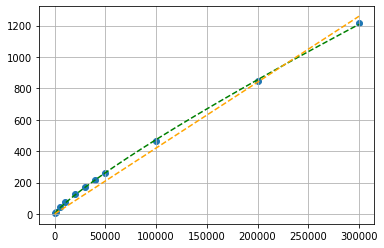

In [10]:
from scipy.optimize import curve_fit
%matplotlib inline

def linFunc(x, a, b):
    return a*x+b

def linFunc0b(x, a):
    return a*x

def powerLaw(x, a, b):
    return b*x**a

popt_pow, pcov_pow = curve_fit(powerLaw, req_list, N_crits)
popt_lin, pcov_lin = curve_fit(linFunc0b, req_list, N_crits)
x_cont = np.linspace(req_list[0], req_list[-1], 1000)

plt.scatter(req_list, N_crits)
plt.plot(x_cont, powerLaw(x_cont, *popt_pow), c='green', ls="--")
plt.plot(x_cont, linFunc0b(x_cont, *popt_lin), c='orange', ls="--")
plt.grid()
# plt.xscale("log")
# plt.yscale("log")

plt.show()

<IPython.core.display.Javascript object>


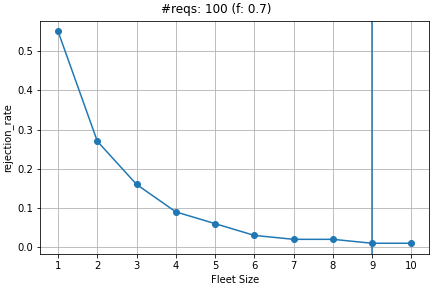

9


<IPython.core.display.Javascript object>


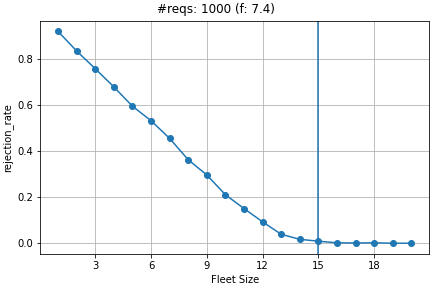

15


<IPython.core.display.Javascript object>


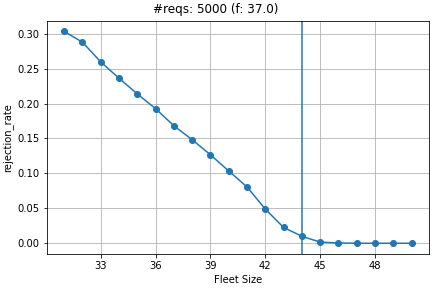

44


<IPython.core.display.Javascript object>


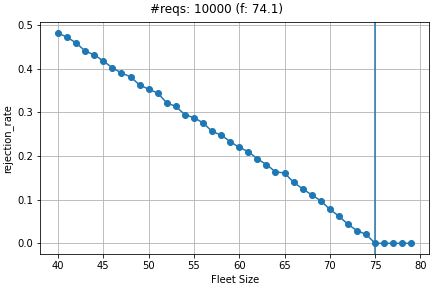

75


<IPython.core.display.Javascript object>


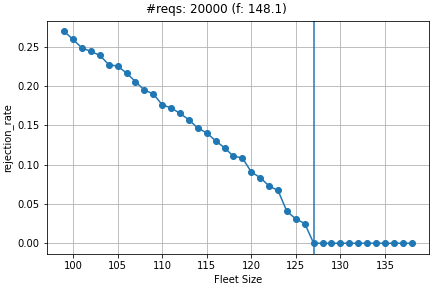

127


<IPython.core.display.Javascript object>


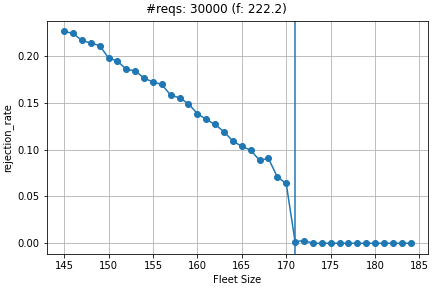

171


<IPython.core.display.Javascript object>


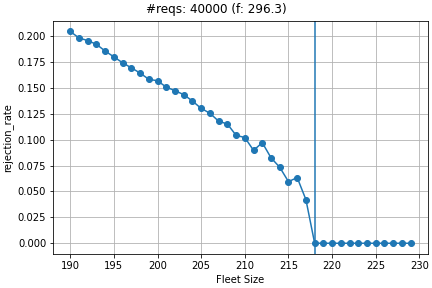

218


<IPython.core.display.Javascript object>


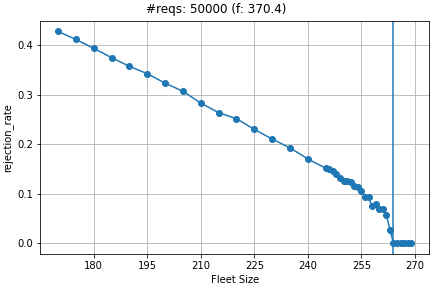

264


<IPython.core.display.Javascript object>


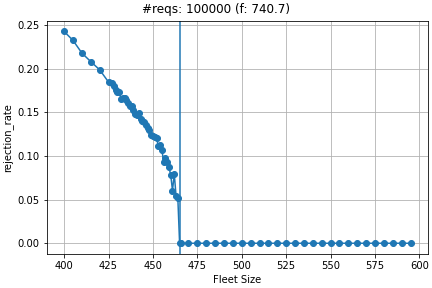

465


<IPython.core.display.Javascript object>


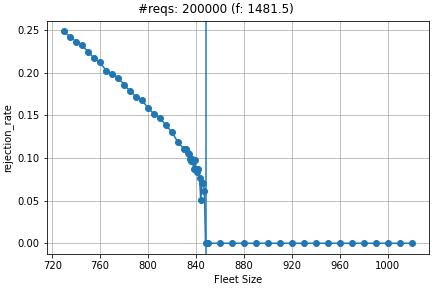

848


<IPython.core.display.Javascript object>


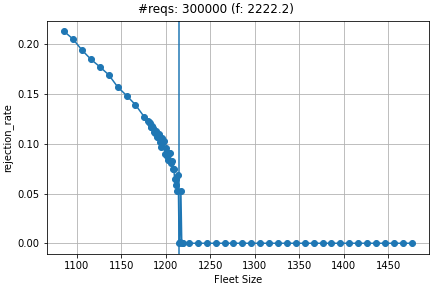

1215


In [36]:
from matplotlib.ticker import MaxNLocator
%matplotlib notebook

timescale = 1/15 #2km/(30km/h)

for i in range(len(req_list)):
    req = req_list[i]
    fig, ax = plt.subplots(constrained_layout=True)
    crit_idx = crit_idx_list[i]

    sub_df = df[df["requests"]==req]
    N_crit = sub_df["fleet_size"].iloc[crit_idx]
    
    #Pick entries
    fleet_list = sub_df["fleet_size"]#.iloc[:crit_idx+1]
    rejection_rate = sub_df["rejection_rate"]#.iloc[:crit_idx+1]
#     order_param = (N_crit-fleet_list)/N_crit
    order_param = fleet_list
    print(N_crit)
    
    ax.plot(order_param, rejection_rate, "o-")
    ax.axvline(N_crit)

    ax.set_xlabel("Fleet Size")
    ax.set_ylabel("rejection_rate")
#     ax.set_xscale("log")
#     ax.set_yscale("log")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.grid()
    fig.suptitle("#reqs: {} (f: {})".format(req, round(req/9*timescale, 1)))
    fig.savefig("figures/{}requests.jpg".format(req), dpi=200)

    plt.show()

<IPython.core.display.Javascript object>


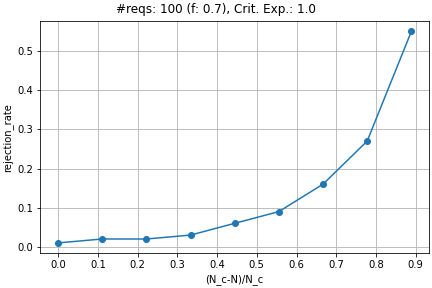

<IPython.core.display.Javascript object>


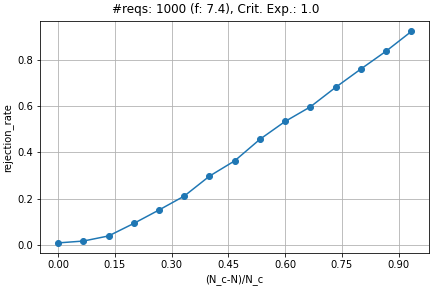

<IPython.core.display.Javascript object>


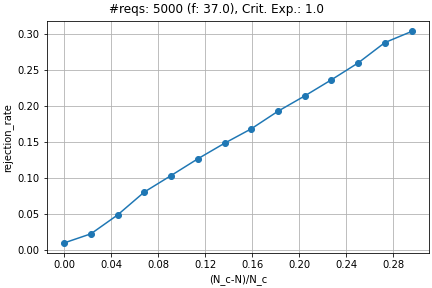

<IPython.core.display.Javascript object>


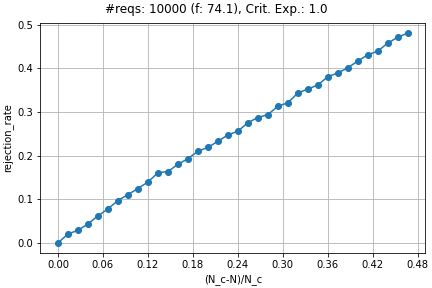

<IPython.core.display.Javascript object>


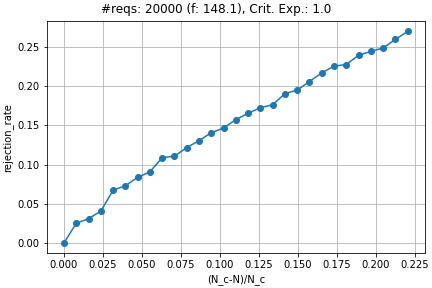

<IPython.core.display.Javascript object>


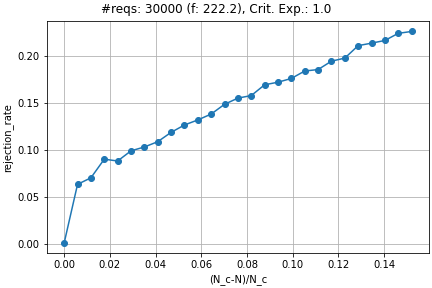

<IPython.core.display.Javascript object>


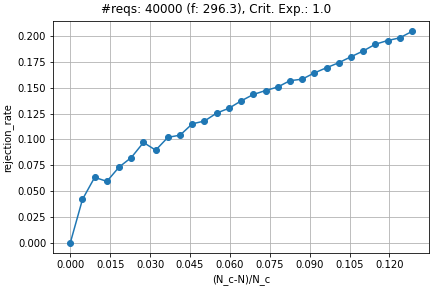

<IPython.core.display.Javascript object>


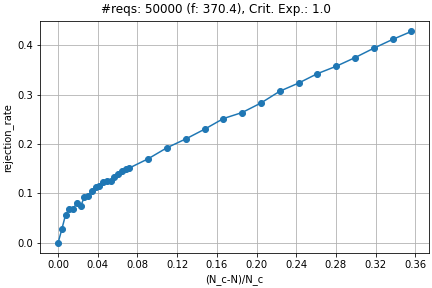

<IPython.core.display.Javascript object>


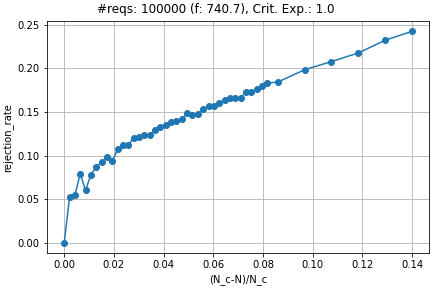

/data/hheuer/matsim-bimodal/python_analysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


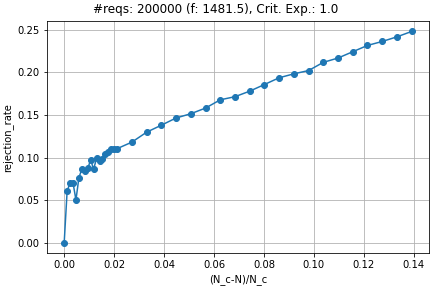

<IPython.core.display.Javascript object>


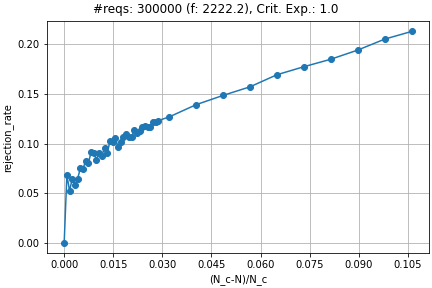

In [39]:
for i in range(len(req_list)):
    req = req_list[i]
    fig, ax = plt.subplots(constrained_layout=True)
    crit_idx = crit_idx_list[i]

    sub_df = df[df["requests"]==req]
    N_crit = sub_df["fleet_size"].iloc[crit_idx]
    
    fleet_list = sub_df["fleet_size"].iloc[:crit_idx+1]
    rejection_rate = sub_df["rejection_rate"].iloc[:crit_idx+1]
    order_param = (N_crit-fleet_list)/N_crit
    
#     x_log = np.log(order_param)
#     y_log = np.log(rejection_rate)
#     popt, pcov = curve_fit(linFunc, x_log[-3:], y_log[-3:])
#     print("Critical Exponent: ", popt[0])
    
    ax.plot(order_param, rejection_rate, "o-")
#     ax.plot(order_param, np.exp(popt[1])*order_param**popt[0], "-")

    ax.set_xlabel("(N_c-N)/N_c")
    ax.set_ylabel("rejection_rate")
#     ax.set_xscale("log")
#     ax.set_yscale("log")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    # fig.suptitle(r"$125\cdot 10^3$" + " requests " + r"$(\nu={}\,\mathrm{{s}}^{{-1}})$".format(round(125*10**3/(10*3600), 3)))
#     ax.set_ylim(0,1.1)
    ax.grid()
    #fig.suptitle("Freq: {} <r>/v_drt".format(req/(10*timescale)))
    fig.suptitle("#reqs: {} (f: {}), Crit. Exp.: {}".format(req, round(req/9*timescale, 1), round(popt[0],3)))

    fig.savefig("figures/{}requestsLogLog.jpg".format(req), dpi=200)
    plt.show()

---

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(fleet_list, av_drt_occs, 'o-')

ax.set_xlabel("Fleet Size")

plt.show()

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(fleet_list, av_detours, 'o-')

ax.set_xlabel("Fleet Size")

plt.show()

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(fleet_list, av_drt_occs/av_detours, 'o-')

ax.set_xlabel("Fleet Size")

plt.show()

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

#Normalize by TT for private car
ax.plot(fleet_list, tt_bimodal_rescaled, 'o-')

ax.set_xlabel("Fleet Size")

plt.show()

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

#Normalize by TT for private car
ax.plot(fleet_list, wait_times_rescaled, 'o-')

ax.set_xlabel("Fleet Size")

plt.show()

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(fleet_list, standing_fractions, 'o-')

ax.set_xlabel("Fleet Size")

plt.show()

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(fleet_list, cummulative_drt_bimodal_rescaled, 'o-')

ax.set_xlabel("Fleet Size")

plt.show()

In [ ]:
def isParetoEfficient(costs):
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        is_efficient[i] = np.all(np.any(costs[:i]>c, axis=1)) and np.all(np.any(costs[i+1:]>c, axis=1))
    return is_efficient

In [ ]:
costs = np.stack((cummulative_drt_bimodal_rescaled, tt_bimodal_rescaled), axis=1)

In [ ]:
%matplotlib inline

pareto_efficient = isParetoEfficient(costs)
fig, ax = plt.subplots(constrained_layout=True)

scatter = ax.scatter(cummulative_drt_bimodal_rescaled, tt_bimodal_rescaled, c=pareto_efficient)
# ax.plot(cummulative_drt_bimodal_rescaled, tt_bimodal_rescaled)
handles, labels = scatter.legend_elements()
labels = ["pareto unoptimal", "pareto optimal"]

ax.set_xlabel("driven_distance_bimodal / driven_distance_car")
ax.set_ylabel("tt_bimodal / tt_car")
ax.legend(handles, labels)
# fig.colorbar(scatter)

plt.show()

In [ ]:
x = np.linspace(0.0001,10,100)
y = np.sqrt(x)
log_x = np.log(x)
log_y = np.log(y)

plt.figure()

plt.plot(log_x,log_y)
plt.grid()

plt.show()

print("Exp: 1/2")